In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from keras.optimizers import RMSprop
from keras.models import Sequential

In [4]:
df= pd.read_csv('/content/mnist_train.csv')

In [5]:
df.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,...,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
target= df.iloc[:,0]

In [7]:
target

0       0
1       4
2       1
3       9
4       2
       ..
3442    0
3443    2
3444    6
3445    8
3446    9
Name: 5, Length: 3447, dtype: int64

In [13]:
features= df.iloc[:,1:].values.reshape(len(df),28,28,1)
features.shape

(3447, 28, 28, 1)

In [9]:
features

array([[[[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        ...,

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]]],


       [[[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [

In [11]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [12]:
x_train.shape

(2585, 28, 28, 1)

In [14]:
y_train= keras.utils.to_categorical(y_train)
y_test= keras.utils.to_categorical(y_test)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [22]:
epochs=5
batch_size=100
no_classes=10

## Build the Model

In [35]:
model= Sequential()
model.add(Conv2D(675,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(250,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(no_classes,activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 675)       6750      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 13, 13, 675)       0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 250)       1519000   
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 5, 5, 250)         0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 3, 3, 100)         225100    
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 1, 1, 100)       

In [21]:
350*2/3

233.33333333333334

In [36]:
model.compile(optimizer=RMSprop(),loss=tf.keras.losses.categorical_crossentropy,metrics='accuracy')

In [37]:
history= model.fit(x_train,y_train,epochs=10, batch_size= batch_size,verbose=2, validation_data=(x_test,y_test))

Epoch 1/10
26/26 - 2s - loss: 11.7970 - accuracy: 0.1164 - val_loss: 2.3023 - val_accuracy: 0.1102 - 2s/epoch - 87ms/step
Epoch 2/10
26/26 - 1s - loss: 2.3022 - accuracy: 0.1118 - val_loss: 2.3021 - val_accuracy: 0.1102 - 773ms/epoch - 30ms/step
Epoch 3/10
26/26 - 1s - loss: 2.3017 - accuracy: 0.1118 - val_loss: 2.3016 - val_accuracy: 0.1102 - 853ms/epoch - 33ms/step
Epoch 4/10
26/26 - 1s - loss: 2.3010 - accuracy: 0.1118 - val_loss: 2.3014 - val_accuracy: 0.1102 - 855ms/epoch - 33ms/step
Epoch 5/10
26/26 - 1s - loss: 2.3008 - accuracy: 0.1118 - val_loss: 2.3013 - val_accuracy: 0.1102 - 845ms/epoch - 32ms/step
Epoch 6/10
26/26 - 1s - loss: 2.3004 - accuracy: 0.1118 - val_loss: 2.3012 - val_accuracy: 0.1102 - 845ms/epoch - 32ms/step
Epoch 7/10
26/26 - 1s - loss: 2.3003 - accuracy: 0.1075 - val_loss: 2.3015 - val_accuracy: 0.1102 - 848ms/epoch - 33ms/step
Epoch 8/10
26/26 - 1s - loss: 2.3001 - accuracy: 0.1087 - val_loss: 2.3018 - val_accuracy: 0.1102 - 786ms/epoch - 30ms/step
Epoch 9/10

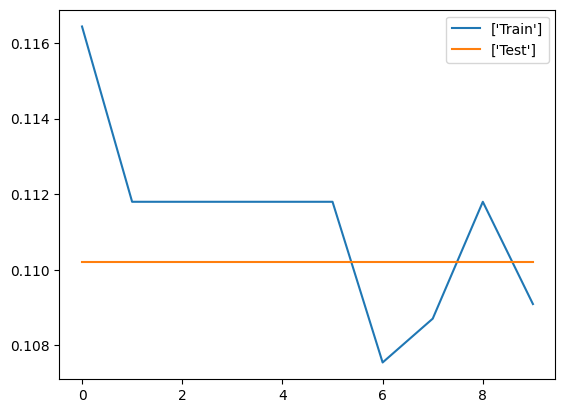

In [39]:
plt.plot(range(10),history.history['accuracy'],label=['Train'])
plt.plot(range(10),history.history['val_accuracy'],label=['Test'])
plt.legend()

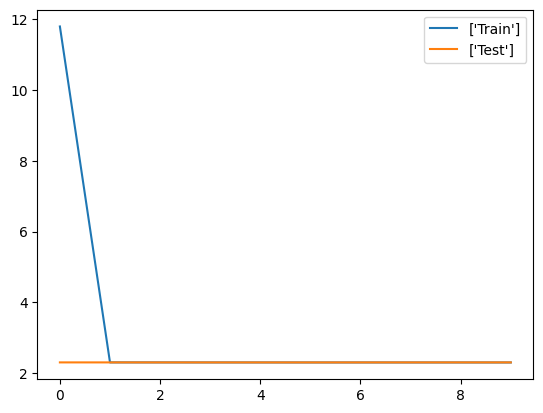

In [40]:
plt.plot(range(10),history.history['loss'],label=['Train'])
plt.plot(range(10),history.history['val_loss'],label=['Test'])
plt.legend()